### Change of basis matrix


A change of basis matrix is a matrix that translates vector representations from one basis, such as the standard coordinate system, to another basis. A change of basis matrix also allows us to perform transforms when the new basis vectors are not orthogonal to each other.

Given our standard coordinate system consisting of the basis vectors, we can have an alternative vector space consisting of the blue basis vectors, and a vector b represented in coordinates of that alternative vector space.

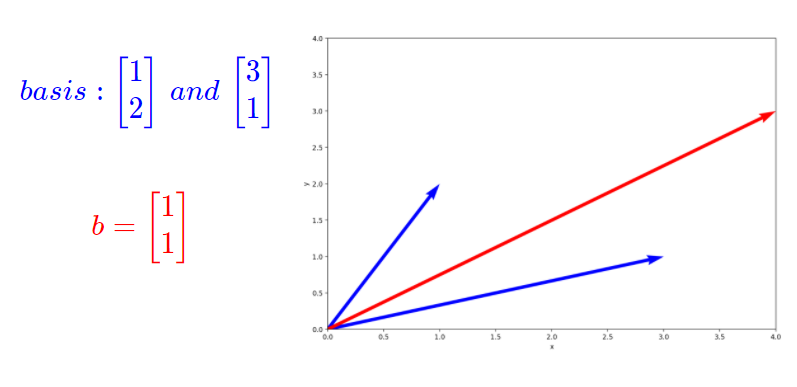


&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Image Source: https://programmathically.com

We can use transform b from the alternative basis into our standard coordinate system as follows:

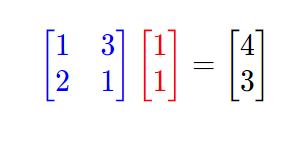


&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Image Source: https://programmathically.com

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
A = np.array([[1, 3], [2, 1]])
A

array([[1, 3],
       [2, 1]])

In [10]:
b = np.array([[1],[1]])
b

array([[1],
       [1]])

In [12]:
np.dot(A, b)

array([[4],
       [3]])

So the vector (1,1) in our alternative basis corresponds to (4, 3) in our standard coordinate system. The blue matrix is the transformation matrix that represents the change of basis from the alternative vector space to the standard coordinate system.

To perform the reverse transformation and go from the alternative vector space to the standard coordinate system, we need to find the inverse matrix of the blue matrix (I call it blue from here). Applying the procedure we’ve learned in the chapter on matrix determinants, the inverse of blue is

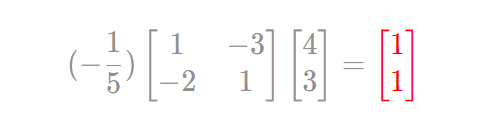

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Image Source: https://programmathically.com

In [13]:
A_inv = np.linalg.inv(A)
A_inv

array([[-0.2,  0.6],
       [ 0.4, -0.2]])

In [14]:
np.dot(A_inv, np.dot(A, b))

array([[1.],
       [1.]])

### Eigendecomposition

The eigenvalue decomposition or eigendecomposition is the process of decomposing a matrix into its eigenvectors and eigenvalues. 

The **eigendecomposition** of some matrix $A$ is 

$A = V \Lambda V^{-1}$

Where: 

* As in examples above, $V$ is the concatenation of all the eigenvectors of $A$
* $\Lambda$ (upper-case $\lambda$) is the diagonal matrix diag($\lambda$). Note that the convention is to arrange the lambda values in descending order; as a result, the first eigenvalue (and its associated eigenvector) may be a primary characteristic of the matrix $A$.

The eigenvalue decomposition or eigendecomposition is the process of decomposing a matrix into its eigenvectors and eigenvalues. We can also transform a matrix into an Eigenbasis (the basis matrix where every column is an eigenvector).

# Use of Eigendecomposition

Matrix operations such as transformations or multiplications are computationally expensive. In applications such as machine learning, you often have thousands or millions of dimensions. Imagine you have to perform matrix transformations repeatedly on matrices in millions of dimensions. Even the best computers quickly reach their limits. But as we discussed before, operations are much simpler on diagonal matrices. So if we can decompose a matrix into a diagonal form before we apply any kind of costly operation, it makes our lives, as well as the lives of our computers, much easier. Enter Eigendecomposition.


For an eigenvector, multiplication with the transformation matrix A, is equivalent to multiplying with a simple scalar λ. If we expand this idea from vectors to matrices, most matrices can be decomposed into a matrix of column eigenvectors P and a diagonal matrix D that is filled with eigenvalues on the main diagonal. When we multiply P and D, each column (each eigenvector) would be multiplied with the corresponding scalar (each eigenvalue).

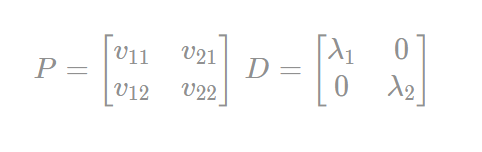

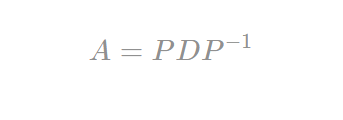

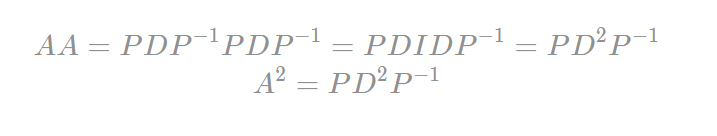

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Image Source: https://programmathically.com

In [16]:
A = np.array([[2, 1],[1, 2]])
A

array([[2, 1],
       [1, 2]])

In [17]:
lambdas, V = np.linalg.eig(A)

In [19]:
lambdas

array([3., 1.])

In [20]:
V

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [21]:
np.dot(V, np.dot(np.diag(lambdas), np.linalg.inv(V)))

array([[2., 1.],
       [1., 2.]])

We get matrix A back.

Let's try A^2

In [23]:
np.dot(V, np.dot(np.diag(lambdas) ** 2, np.linalg.inv(V))) 

array([[5., 4.],
       [4., 5.]])

#### It is important to note here that, squaring of diagonal matrix is equivalent to squaring each of it's individual elements, this is not true in case of normal matrices like A. hence diagonal matrices reduce computation drastically which makes the life of computers easier.

In [27]:
np.dot(A,A)

array([[5, 4],
       [4, 5]])

Eigendecomposition is not possible with all matrices. And in some cases where it is possible, the eigendecomposition involves complex numbers instead of straightforward real numbers. 

In machine learning, however, we are typically working with real symmetric matrices, which can be conveniently and efficiently decomposed into real-only eigenvectors and real-only eigenvalues. If $A$ is a real symmetric matrix then...

$A = Q \Lambda Q^T$

...where $Q$ is analogous to $V$ from the previous equation except that it's special because it's an orthogonal matrix. 

In [28]:
lambdas, Q = np.linalg.eig(A)

In [29]:
lambdas

array([3., 1.])

In [30]:
Lambda = np.diag(lambdas)
Lambda

array([[3., 0.],
       [0., 1.]])

In [31]:
Q

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

Let's confirm $A = Q \Lambda Q^T$: 

In [32]:
np.dot(Q, np.dot(Lambda, Q.T))

array([[2., 1.],
       [1., 2.]])

(As a quick aside, we can demostrate that $Q$ is an orthogonal matrix because $Q^TQ = QQ^T = I$.)

In [33]:
np.dot(Q.T, Q)

array([[1., 0.],
       [0., 1.]])

In [34]:
np.dot(Q, Q.T)

array([[1., 0.],
       [0., 1.]])

**Exercises**:

1. Use PyTorch to decompose the matrix $P$ (below) into its components $V$, $\Lambda$, and $V^{-1}$. Confirm that $P = V \Lambda V^{-1}$.
2. Use PyTorch to decompose the symmetric matrix $S$ (below) into its components $Q$, $\Lambda$, and $Q^T$. Confirm that $S = Q \Lambda Q^T$.

In [36]:
P = torch.tensor([[25, 2, -5], [3, -2, 1], [5, 7, 4.]])
P

tensor([[25.,  2., -5.],
        [ 3., -2.,  1.],
        [ 5.,  7.,  4.]])

In [37]:
lambdas, V = np.linalg.eig(P)

In [38]:
lambdas

array([23.764437 ,  6.6683826, -3.432819 ], dtype=float32)

In [40]:
Lambda = np.diag(lambdas)
Lambda

array([[23.764437 ,  0.       ,  0.       ],
       [ 0.       ,  6.6683826,  0.       ],
       [ 0.       ,  0.       , -3.432819 ]], dtype=float32)

In [42]:
np.dot(V, np.dot(Lambda, np.linalg.inv(V))) 

array([[25.000002 ,  2.       , -5.0000005],
       [ 3.0000002, -2.       ,  1.       ],
       [ 5.0000005,  7.0000005,  4.000001 ]], dtype=float32)

In [43]:
S = torch.tensor([[25, 2, -5], [2, -2, 1], [-5, 1, 4.]])
S

tensor([[25.,  2., -5.],
        [ 2., -2.,  1.],
        [-5.,  1.,  4.]])

In [44]:
lambdas, V = np.linalg.eig(S)

In [45]:
lambdas

array([26.236076 ,  3.2434747, -2.479551 ], dtype=float32)

In [46]:
Lambda = np.diag(lambdas)
Lambda

array([[26.236076 ,  0.       ,  0.       ],
       [ 0.       ,  3.2434747,  0.       ],
       [ 0.       ,  0.       , -2.479551 ]], dtype=float32)

In [48]:
np.dot(V, np.dot(Lambda, V.T) )

array([[25.000002 ,  2.       , -4.9999995],
       [ 2.       , -2.       ,  1.0000001],
       [-5.       ,  1.       ,  4.       ]], dtype=float32)